In [2]:
import numpy as np

# Define the file path
file_path = "./data/bin/mig_disappear.bin"

# Read the binary file and reshape it into an 8 * 86 * 34 matrix
try:
    with open(file_path, 'rb') as f:
        # Read all data and convert it to a numpy array of floats
        data = np.fromfile(f, dtype=np.float64)
    
    # Reshape the data into an 8 * 86 * 34 matrix
    matrix = data.reshape((8, 86, 34))
    
    # Print the shape of the matrix to confirm
    print("Matrix shape:", matrix.shape)

except FileNotFoundError:
    print("File not found. Please check the file path.")
except ValueError:
    print("The file does not contain enough data to reshape into the specified dimensions.")


Matrix shape: (8, 86, 34)


In [4]:
matrix[0][0]

array([0.0071    , 0.0003    , 0.0003    , 0.0003    , 0.0004    ,
       0.0002    , 0.0002    , 0.0002    , 0.0001    , 0.0001    ,
       0.0003    , 0.0001    , 0.0001    , 0.00479594, 0.0001    ,
       0.0003    , 0.0002    , 0.0002    , 0.0003    , 0.0003    ,
       0.0004    , 0.0005    , 0.0005    , 0.0004    , 0.0004    ,
       0.0004    , 0.0004    , 0.0003    , 0.0003    , 0.0003    ,
       0.0004    , 0.0004    , 0.0005    , 0.0005    ])

In [28]:

import numpy as np
import pandas as pd 

# Load and reshape result_matrix
result_matrix = np.fromfile("data/bin/result_matrix_data.bin", dtype=np.float64)  # Specify data type if needed
result_matrix = result_matrix.reshape(8, 86, 35)  # Reshape to correct dimensions (8 cohorts, 86 ages, 35 years)

# Load and reshape death_matrix
death_matrix = np.fromfile("data/bin/death_by_cohort.bin", dtype=np.float64)  # Specify data type if needed
death_matrix = death_matrix.reshape(2, 86, 34)  # Reshape to correct dimensions (2 groups, 86 ages, 34 years)

# Load and reshape fertility_matrix
fertility_matrix = np.fromfile("data/bin/AESFR_matrix_combine.bin", dtype=np.float64)  # Specify data type if needed
fertility_matrix = fertility_matrix.reshape(12, 71, 35)  # Reshape to correct dimensions (12 groups, 71 ages, 35 years)



In [31]:
result_matrix[1][:][:]/400

array([[38.3475, 42.5425, 40.525 , ..., 24.745 , 22.965 , 23.01  ],
       [45.1625, 38.8375, 43.08  , ..., 26.785 , 26.81  , 24.7925],
       [39.8525, 45.59  , 39.22  , ..., 30.295 , 27.5775, 27.4375],
       ...,
       [ 4.1675,  4.43  ,  4.5375, ..., 19.03  , 19.655 , 20.29  ],
       [ 3.3325,  3.7475,  4.0025, ..., 14.2625, 18.2125, 18.8275],
       [15.0975, 16.1125, 17.18  , ..., 86.725 , 90.385 , 97.795 ]])

In [3]:
fertility_matrix = np.fromfile("data/bin/AESFR_matrix_combine(r).bin", dtype=np.float64)  # Specify data type if needed
fertility_matrix = fertility_matrix.reshape((12, 71, 35), order='F')  # Reshape to correct dimensions (12 groups, 71 ages, 35 years)


In [72]:
fertility_matrix.tofile("data/bin/AESFR_matrix_combine.bin")

In [4]:
for i in range(12):
  print( sum(fertility_matrix[i, 42, :]))

0.8731472668269227
1.8366201129807695
1.0136537235576923
1.8366201129807695
0.8731472668269227
1.8366201129807695
1.0136537235576923
1.8366201129807695
0.8731472668269227
1.8366201129807695
1.0136537235576923
1.8366201129807695


In [37]:
birth = sum(result_matrix[1, 14:49, 0]/400 * fertility_matrix[0, 0, :])

In [38]:
birth

89.04977951193956

In [39]:
y = 32
birth = sum(result_matrix[1, 14:49, y]/400 * fertility_matrix[0, y + 10, :])

In [ ]:
esult_matrix[1, 14:49, y]

In [40]:
birth

48.06370414754567

In [5]:
# Simulate population dynamics
simulated_matrix = np.zeros((8, 86, 34))  # Assuming shape (8, 86, 34) for years 1990 to 2023

for i in range(8):
    for year in range(1990, 2023):  # Correct year range
        y_idx = year - 1990
        mortality_rate = death_matrix[i % 2, 0:85, y_idx]  # Mortality rate for ages 0 to 85
        people_next = result_matrix[i, 0:85, y_idx] * (1 - mortality_rate)  # Adjust people based on mortality
        people_next[-1] = people_next[-1] + result_matrix[i, 85, y_idx] * (1-death_matrix[i % 2, 85, y_idx])  # Age 86+
        simulated_matrix[i, 1:86, y_idx+1] = people_next # 85 not included
        # New birth (not accounting for migration this year)

# For specific female population birth simulation
for i in [1, 3, 5, 7]:  # Assuming these indices are for female populations
    for year in range(1991, 2024):  # Correct year range for births
        y_idx = year - 1990
        y_fer_idx = year - 1980  # Indexing fertility rates
        # Females aged 15 to 49
        females = result_matrix[i, 14:49, y_idx]  # Extract female population for reproductive ages
        
        fer_rates = fertility_matrix[i // 2, y_fer_idx, :]  # Fertility rates for ages 15-49
        new_born = sum(females * fer_rates)  # Calculate new births
        
        female_newborns = np.round(new_born / 2.06)  # Female newborns (approx. 1/2.06)
        male_newborns = np.round(new_born * 1.06 / 2.06)  # Male newborns (1.06 males per female)

        # Assign new born to age 0
        simulated_matrix[i, 0, y_idx] = female_newborns
        simulated_matrix[i - 1, 0, y_idx] = male_newborns


# get net migration


In [10]:
np.round(simulated_matrix) 

array([[[0.0000e+00, 1.6796e+04, 1.6768e+04, ..., 1.0647e+04,
         9.8930e+03, 1.0705e+04],
        [0.0000e+00, 1.6695e+04, 1.8390e+04, ..., 1.1172e+04,
         1.0526e+04, 1.0467e+04],
        [0.0000e+00, 1.9228e+04, 1.6997e+04, ..., 1.1945e+04,
         1.2111e+04, 1.1283e+04],
        ...,
        [0.0000e+00, 1.1010e+03, 1.1040e+03, ..., 4.0420e+03,
         4.7840e+03, 4.8870e+03],
        [0.0000e+00, 8.9200e+02, 9.7000e+02, ..., 3.1220e+03,
         3.6990e+03, 4.3830e+03],
        [0.0000e+00, 3.0200e+03, 3.3450e+03, ..., 1.7255e+04,
         1.7621e+04, 1.8393e+04]],

       [[0.0000e+00, 1.5846e+04, 1.5819e+04, ..., 1.0044e+04,
         9.3330e+03, 1.0099e+04],
        [0.0000e+00, 1.5244e+04, 1.7012e+04, ..., 1.0802e+04,
         9.8700e+03, 9.8950e+03],
        [0.0000e+00, 1.8061e+04, 1.5530e+04, ..., 1.1624e+04,
         1.1745e+04, 1.0711e+04],
        ...,
        [0.0000e+00, 1.7840e+03, 1.8250e+03, ..., 5.6410e+03,
         7.0680e+03, 7.2100e+03],
        [0.0

In [31]:
np.round(simulated_matrix[0,0,1:]) 

array([16796., 16768., 17034., 16987., 16706., 16630., 15964., 14022.,
       14231., 15720., 13277., 13169., 11787., 11680., 11744., 11812.,
       12196., 12270., 11885., 11204., 11655., 12733., 11340., 12289.,
       12034., 11772., 11154., 10922., 11128., 10596., 10647.,  9893.,
       10705.])

In [32]:
result_matrix[0,0,1:34]

array([18396., 17102., 17702., 17644., 17509., 17080., 16663., 16204.,
       14684., 14823., 15269., 13157., 12968., 11988., 12218., 12272.,
       12405., 13043., 12279., 11690., 11275., 12330., 12651., 11592.,
       12343., 12152., 11498., 10995., 11072., 11176., 10530., 10472.,
        9886.])

In [27]:
18396 / 16796 * 42

46.00095260776376

In [13]:
net_migration = result_matrix[:,:,1:34] - np.round(simulated_matrix[:,:,1:]) 

In [33]:
net_migration[0,0,:]

array([1600.,  334.,  668.,  657.,  803.,  450.,  699., 2182.,  453.,
       -897., 1992.,    0., 1181.,  308.,  474.,  460.,  209.,  773.,
        394.,  486., -380., -403., 1311., -697.,  309.,  380.,  344.,
         73.,  -56.,  580., -117.,  579., -819.])

In [35]:
net_migration[0,0,20]

-380.0

In [25]:
result_matrix[5,:,:] * 0.05

array([[ 90.5 ,  97.45,  98.75, ...,  59.4 ,  56.15,  57.95],
       [ 91.8 ,  91.95,  98.6 , ...,  63.35,  67.65,  61.8 ],
       [ 88.6 ,  92.8 ,  93.5 , ...,  70.3 ,  67.5 ,  71.25],
       ...,
       [  1.75,   1.7 ,   1.7 , ...,  22.1 ,  24.7 ,  21.4 ],
       [  0.6 ,   1.55,   1.55, ...,  18.6 ,  20.35,  23.7 ],
       [  4.25,   4.15,   5.05, ...,  90.8 ,  97.6 , 104.  ]])

In [27]:
# Rounding 
net_migration = np.where(np.abs(net_migration) <= 20, 0, net_migration)

migration_in = np.where(net_migration > 0, net_migration, 0)

# Create migration_out: only values <= 0, otherwise set to 0
migration_out = np.where(net_migration <= 0, net_migration, 0)

In [43]:

migration_out_rate = migration_out / np.round(simulated_matrix[:,:,1:])  
migration_out_rate.shape

(8, 86, 33)

In [50]:
migration_in_extended = np.concatenate(( np.zeros((8, 86, 1)),migration_in), axis=2)


In [51]:
migration_in_extended[1,:,:]

array([[   0., 1171.,  391., ...,    0.,  565.,    0.],
       [   0.,  291.,  220., ...,  945.,  844.,  829.],
       [   0.,  175.,  158., ...,  138.,  373.,  320.],
       ...,
       [   0.,    0.,    0., ...,  325.,  544.,  652.],
       [   0.,    0.,    0., ...,  223.,  390.,  602.],
       [   0.,    0.,    0., ...,   73.,  128.,  687.]])

In [56]:
migration_out_rate_extended = np.concatenate(( np.zeros((8, 86, 1)),migration_out_rate), axis=2)

In [54]:
migration_out_rate_extended.tofile("data/bin/emigrate.bin")
migration_in_extended.tofile("data/bin/migration_in.bin")

In [55]:
migration_out_rate.shape

(8, 86, 33)

In [53]:
migration_in.shape


(8, 86, 33)

In [44]:
migration_in

array([[[1600.,  334.,  668., ...,    0.,  579.,    0.],
        [ 307.,  149.,  263., ...,  944.,  763.,  743.],
        [ 201.,  179.,  167., ...,  141.,  418.,  333.],
        ...,
        [   0.,    0.,    0., ...,  262.,  389.,  514.],
        [   0.,    0.,   43., ...,  179.,  326.,  432.],
        [   0.,    0.,    0., ...,    0.,   64.,  512.]],

       [[1171.,  391.,  205., ...,    0.,  565.,    0.],
        [ 291.,  220.,  280., ...,  945.,  844.,  829.],
        [ 175.,  158.,  186., ...,  138.,  373.,  320.],
        ...,
        [   0.,    0.,    0., ...,  325.,  544.,  652.],
        [   0.,    0.,   78., ...,  223.,  390.,  602.],
        [   0.,    0.,    0., ...,   73.,  128.,  687.]],

       [[   0.,    0.,    0., ...,    0.,   32.,    0.],
        [  36.,    0.,    0., ...,   86.,   68.,   55.],
        [   0.,    0.,    0., ...,    0.,   33.,    0.],
        ...,
        [   0.,    0.,    0., ...,    0.,   24.,   29.],
        [   0.,    0.,    0., ...,    0.,    

In [42]:
migration_out_rate

array([[[ 0.        ,  0.        ,  0.        , ..., -0.01098901,
          0.        , -0.07650631],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        , -0.02355072,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.0089404 , -0.01165919,  0.        , ..., -0.00312953,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ..., -0.01712465,
          0.        , -0.09040499],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  

In [12]:
net_migration[0,15,:]

array([ 1.6529e+04,  2.5000e+01,  2.5000e+01, -6.0000e+00,  1.4000e+01,
        8.0000e+00,  1.4000e+01,  4.2000e+01,  4.6000e+01,  3.1000e+01,
        1.8000e+01,  3.5000e+01,  3.6000e+01, -4.8000e+01,  2.2000e+01,
        4.4000e+01,  4.5000e+01,  5.2000e+01,  2.1400e+02,  1.0800e+02,
        3.6000e+01, -1.3000e+01,  9.0000e+00, -1.0000e+01,  4.8000e+01,
        7.2000e+01,  6.1000e+01,  1.1100e+02,  7.2000e+01,  1.4300e+02,
        4.4000e+01, -2.2200e+02,  3.4600e+02,  2.5500e+02])

## 1991 and 1992

In [85]:
result_matrix[0,:,1]

array([18396., 17002., 19429., 17325., 14086., 14806., 15664., 14804.,
       16064., 16103., 16151., 16119., 16315., 15480., 16987., 16312.,
       16548., 18091., 19269., 18477., 18099., 17355., 17275., 18781.,
       19469., 21094., 21563., 22506., 22517., 22901., 23764., 23948.,
       24427., 23835., 24434., 23310., 22754., 22725., 21353., 20297.,
       19376., 19441., 19056., 17894., 17698., 12356.,  9504., 11788.,
       10249., 10376., 11841., 11661., 11155.,  9234.,  7811.,  8048.,
        8789.,  7877.,  7479.,  7056.,  6767.,  6497.,  6148.,  5764.,
        5458.,  4832.,  4471.,  4213.,  3879.,  3681.,  3485.,  3298.,
        2980.,  2888.,  2777.,  2639.,  2431.,  2297.,  2048.,  1968.,
        1805.,  1522.,  1231.,  1082.,   875.,  2993.])

In [86]:
np.round(simulated_matrix[0,:,1])

array([16796., 16695., 19228., 17148., 13957., 14653., 15540., 14692.,
       15956., 15988., 16029., 16013., 16220., 15422., 16932., 16287.,
       16521., 18113., 19289., 18468., 17909., 17075., 16939., 18250.,
       18966., 20614., 21156., 22120., 22166., 22572., 23499., 23723.,
       24196., 23636., 24225., 23126., 22571., 22517., 21167., 20127.,
       19235., 19291., 18930., 17773., 17603., 12279.,  9426., 11734.,
       10197., 10334., 11806., 11592., 11120.,  9208.,  7792.,  8053.,
        8738.,  7850.,  7470.,  7045.,  6778.,  6481.,  6139.,  5747.,
        5453.,  4837.,  4460.,  4203.,  3894.,  3725.,  3541.,  3292.,
        2979.,  2907.,  2792.,  2670.,  2448.,  2319.,  2059.,  2008.,
        1871.,  1509.,  1227.,  1101.,   892.,  3020.])

In [87]:
result_matrix[0,:,1] - np.round(simulated_matrix[0,:,1])

array([ 1.60e+03,  3.07e+02,  2.01e+02,  1.77e+02,  1.29e+02,  1.53e+02,
        1.24e+02,  1.12e+02,  1.08e+02,  1.15e+02,  1.22e+02,  1.06e+02,
        9.50e+01,  5.80e+01,  5.50e+01,  2.50e+01,  2.70e+01, -2.20e+01,
       -2.00e+01,  9.00e+00,  1.90e+02,  2.80e+02,  3.36e+02,  5.31e+02,
        5.03e+02,  4.80e+02,  4.07e+02,  3.86e+02,  3.51e+02,  3.29e+02,
        2.65e+02,  2.25e+02,  2.31e+02,  1.99e+02,  2.09e+02,  1.84e+02,
        1.83e+02,  2.08e+02,  1.86e+02,  1.70e+02,  1.41e+02,  1.50e+02,
        1.26e+02,  1.21e+02,  9.50e+01,  7.70e+01,  7.80e+01,  5.40e+01,
        5.20e+01,  4.20e+01,  3.50e+01,  6.90e+01,  3.50e+01,  2.60e+01,
        1.90e+01, -5.00e+00,  5.10e+01,  2.70e+01,  9.00e+00,  1.10e+01,
       -1.10e+01,  1.60e+01,  9.00e+00,  1.70e+01,  5.00e+00, -5.00e+00,
        1.10e+01,  1.00e+01, -1.50e+01, -4.40e+01, -5.60e+01,  6.00e+00,
        1.00e+00, -1.90e+01, -1.50e+01, -3.10e+01, -1.70e+01, -2.20e+01,
       -1.10e+01, -4.00e+01, -6.60e+01,  1.30e+01, 

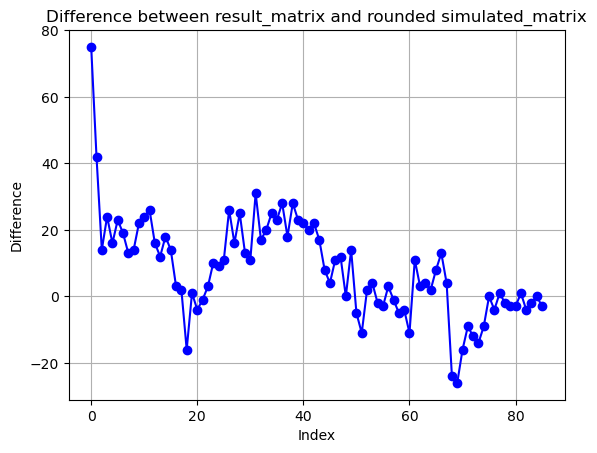

In [89]:
# Plotting vec
import matplotlib.pyplot as plt

vec = result_matrix[4, :, 1] - np.round(simulated_matrix[4, :, 1])

plt.plot(vec, marker='o', linestyle='-', color='b')  # You can customize marker, linestyle, and color
plt.title('Difference between result_matrix and rounded simulated_matrix')
plt.xlabel('Index')
plt.ylabel('Difference')
plt.grid(True)
plt.show()

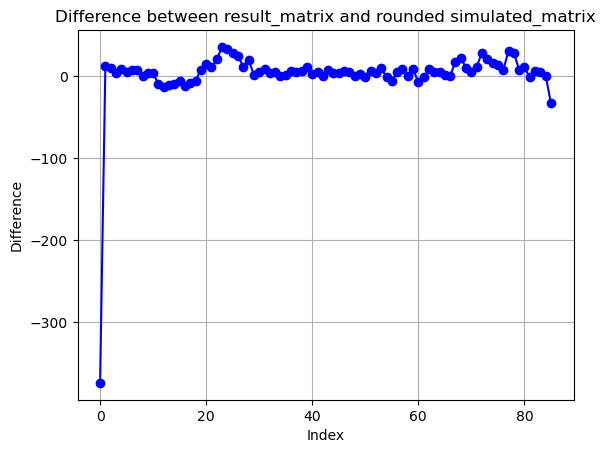

In [90]:
vec = result_matrix[3, :, 10] - np.round(simulated_matrix[3, :, 10])

plt.plot(vec, marker='o', linestyle='-', color='b')  # You can customize marker, linestyle, and color
plt.title('Difference between result_matrix and rounded simulated_matrix')
plt.xlabel('Index')
plt.ylabel('Difference')
plt.grid(True)
plt.show()

In [43]:
(result_matrix[0,:,1] - np.round(simulated_matrix[0,:,1]) ) / np.round(simulated_matrix[0,:,1])

array([ 0.09526078,  0.01838874,  0.01045351,  0.0103219 ,  0.00924267,
        0.01044155,  0.00797941,  0.0076232 ,  0.00676861,  0.00719289,
        0.0076112 ,  0.00661962,  0.00585697,  0.00376086,  0.00324829,
        0.00153497,  0.00163428, -0.0012146 , -0.00103686,  0.00048733,
        0.01060919,  0.01639824,  0.01983588,  0.02909589,  0.02652114,
        0.02328515,  0.01923804,  0.01745027,  0.01583506,  0.01457558,
        0.01127708,  0.00948447,  0.00954703,  0.00841936,  0.00862745,
        0.00795641,  0.00810775,  0.00923747,  0.00878726,  0.00844637,
        0.00733039,  0.00777565,  0.0066561 ,  0.00680808,  0.00539681,
        0.00627087,  0.00827498,  0.00460201,  0.00509954,  0.00406425,
        0.00296459,  0.00595238,  0.00314748,  0.00282363,  0.0024384 ,
       -0.00062089,  0.00583658,  0.00343949,  0.00120482,  0.00156139,
       -0.0016229 ,  0.00246875,  0.00146604,  0.00295807,  0.00091693,
       -0.0010337 ,  0.00246637,  0.00237925, -0.00385208, -0.01

In [29]:
result_matrix[0,:,2]

array([17102., 18539., 17176., 19597., 17432., 14214., 14902., 15740.,
       14860., 16134., 16174., 16225., 16167., 16357., 15492., 17004.,
       16291., 16508., 18025., 19256., 18639., 18373., 17709., 17718.,
       19321., 19911., 21479., 21897., 22838., 22834., 23126., 23963.,
       24139., 24588., 23961., 24540., 23401., 22854., 22789., 21425.,
       20382., 19428., 19487., 19120., 17940., 17726., 12370.,  9504.,
       11763., 10241., 10348., 11793., 11592., 11104.,  9184.,  7750.,
        8012.,  8685.,  7788.,  7391.,  6994.,  6635.,  6404.,  6036.,
        5623.,  5321.,  4715.,  4363.,  4074.,  3730.,  3528.,  3348.,
        3144.,  2808.,  2711.,  2597.,  2465.,  2260.,  2116.,  1873.,
        1775.,  1613.,  1360.,  1078.,   967.,  3306.])

In [26]:
(result_matrix[0,0,:34] - simulated_matrix[0,0,:])/simulated_matrix[0,0,:]

/var/folders/4p/d1jjph_x7hd35z1h1lq9jd3h0000gn/T/ipykernel_18311/1792414949.py:1: RuntimeWarning: divide by zero encountered in divide
  (result_matrix[0,0,:34] - simulated_matrix[0,0,:])/simulated_matrix[0,0,:]


array([        inf,  0.09526078,  0.01991889,  0.03921569,  0.03867664,
        0.04806656,  0.02705953,  0.04378602,  0.15561261,  0.03183192,
       -0.05706107,  0.15003389, -0.00091123,  0.10019513,  0.02636986,
        0.04036104,  0.03894345,  0.01713677,  0.06299919,  0.03315103,
        0.04337737, -0.03260403, -0.03165004,  0.11560847, -0.05671739,
        0.02567725,  0.03227999,  0.03084095,  0.00668376, -0.00503235,
        0.05473764, -0.01098901,  0.05852623, -0.07650631])

In [7]:
females

array([15879., 15246., 15488., 17099., 18138., 17426., 17297., 16887.,
       17160., 18380., 18902., 20700., 20803., 22189., 22014., 22381.,
       22844., 23139., 23545., 23231., 23494., 22647., 22107., 21293.,
       20426., 19589., 18582., 18758., 18236., 17452., 17370., 11930.,
        9287., 11561.,  9843.])

In [ ]:


read the following bin file

result_matrix_data.bin

./data/bin/mig_disappear.bin

./data/bin/disappear.bin

./data/bin/migration_in.bin
./data/bin/AESFR_matrix_combine.bin # 12 * 71 * 35 

print the first 10 elements; 



# matrix check 

In [22]:
import numpy as np

# Read the binary file
data = np.fromfile('./data/bin/AESFR_matrix_combine.bin', dtype=np.float64)

data = data.reshape([12,71,35])
# Show first 10 elements
print("First 10 elements:")
# print(data[:10])

First 10 elements:


In [24]:
data[0][10][:]

array([0.00000000e+00, 2.14319672e-04, 7.40678689e-03, 1.45216230e-02,
       2.13462213e-02, 2.84917131e-02, 3.72900000e-02, 4.93818852e-02,
       6.55329508e-02, 8.39345984e-02, 1.03450762e-01, 1.20262459e-01,
       1.30615984e-01, 1.32117213e-01, 1.26668336e-01, 1.19039250e-01,
       1.11384016e-01, 1.01609795e-01, 9.00836885e-02, 7.73914467e-02,
       6.33957500e-02, 4.93710656e-02, 3.72769262e-02, 2.81681148e-02,
       2.15012582e-02, 1.54375082e-02, 9.51770492e-03, 5.09967213e-03,
       2.35508197e-03, 9.50688525e-04, 3.81573770e-04, 2.03409836e-04,
       1.13245902e-04, 0.00000000e+00, 0.00000000e+00])

In [5]:
import numpy as np

# Read the binary file
data = np.fromfile('result_matrix_data.bin', dtype=np.float64)

# Show first 10 elements
print("First 10 elements:")
print(data[:10])

First 10 elements:
[16814. 18396. 17102. 17702. 17644. 17509. 17080. 16663. 16204. 14684.]


## mig_disappear

In [6]:
# Read the binary file
data = np.fromfile("./data/bin/mig_disappear.bin", dtype=np.float64)

# Show first 10 elements
print("First 10 elements:")
print(data[:10])

First 10 elements:
[0.0071 0.0003 0.0003 0.0003 0.0004 0.0002 0.0002 0.0002 0.0001 0.0001]


## first elements of disappear matrix 


In [12]:
# for migration 
disappear_data = np.fromfile("./data/bin/disappear.bin", dtype=np.float64)

# Show first 10 elements
print("First 10 elements:")
print(disappear_data[:10])

First 10 elements:
[0.     0.0058 0.0003 0.0003 0.0004 0.0004 0.0002 0.0002 0.0001 0.0001]


In [14]:
disappear_data = disappear_data.reshape([8,119, 34])

In [25]:
disappear_data[0][0]

array([0.        , 0.0058    , 0.0003    , 0.0003    , 0.0004    ,
       0.0004    , 0.0002    , 0.0002    , 0.0001    , 0.0001    ,
       0.0001    , 0.0001    , 0.0001    , 0.00835426, 0.0001    ,
       0.0001    , 0.0002    , 0.00215937, 0.0003    , 0.0003    ,
       0.0002    , 0.0005    , 0.0005    , 0.0004    , 0.0004    ,
       0.0003    , 0.0004    , 0.0003    , 0.0003    , 0.0003    ,
       0.0003    , 0.0004    , 0.0005    , 0.0005    ])

In [9]:
len(disappear_data) / 119

272.0

## migration first 10 elements


In [10]:
migration_data = np.fromfile("./data/bin/migration_in.bin", dtype=np.float64)

In [18]:
len(migration_data) /8 /86

34.0

In [ ]:
migration_data

In [17]:
print("First 10 elements:")
print(migration_data[:10])

First 10 elements:
[   0. 1600.  334.  668.  657.  803.  450.  699. 2182.  453.]
